<a href="https://colab.research.google.com/github/ghimiremukesh/Facial_Expression_Prediction_using_Deep_NN/blob/master/%5BTensor_Flow%5D_Multi_class_deep_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This is a fun project I worked on after completing the first course of the deeplearning specialization on coursera by deeplearning.ai. This is not an accurate model, I did a quick rough implementation of the binary classification model that I created for an assignment in the course. 


### *** LETS DO IT NOW USING tensorflow ***

In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import cv2
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
import os

In [123]:
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


Get the list of image files located in the folder 'faces'

In [0]:
images = os.listdir('gdrive/My Drive/Colab Notebooks/faces')


# This is a function to only use the files with classes : anger, fear, disgust, happy, sad, surprised, and neutral. The pictures are from VISGRAF faces Database and Japanese Female Facial Expression (JAFFE) Database. 

In [0]:
def contains_keyword(file):
    keywords = ['AN', 'DI', 'FE', 'HA', 'SA', 'SU', 'NE', '-00','-01','-02','-03','-04','-05','-06'] 
    b_list = [i in files for i in keywords]
    if True in b_list:
        return True
    else:
        return False

## Getting labels and pre-processing images

In [0]:
labels = []
emotions = []
X = []
num_px = 256

# neutral = 0; anger = 1; disgust = 2; fear = 3; happy = 4; sad = 5; surprised = 6;

for files in images:
    if contains_keyword(files):
        fname = "gdrive/My Drive/Colab Notebooks/faces/" + files
        img = cv2.imread(fname)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        my_image = cv2.resize(img, (num_px, num_px)) 
        my_image = img/255.
        X.append(my_image)

    if 'AN' in files or '-04' in files:
        emotions.append('Angry')
        labels.append(1)
    elif 'DI' in files or '-05' in files:
        emotions.append('Disgust')
        labels.append(2)
    elif 'FE' in files or '-06' in files:
        emotions.append('Fear')
        labels.append(3)
    elif 'HA' in files or '-01' in files:
        emotions.append('Happy')
        labels.append(4)
    elif 'SA' in files or '-02' in files:
        emotions.append('Sad')
        labels.append(5)
    elif 'SU' in files or '-03' in files:
        emotions.append('Surprised')
        labels.append(6)    
    elif 'NE' in files or '-00' in files:
        emotions.append('Nuetral')
        labels.append(0)

In [0]:
class_names = ['Neutral', 'Anger', 'Disgust', 'Fear', 'Happy',
               'Sad', 'Surprised']

In [0]:
# total data size
m = len(labels)

Y = np.array(labels)
X = np.array(X)



In [129]:
X.shape

(453, 256, 256)

In [0]:

X_flatten = X.reshape(X.shape[0], -1)

In [131]:
len(Y)

453

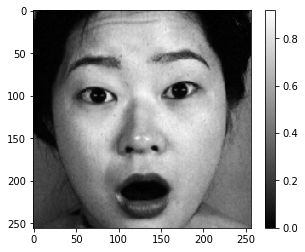

In [132]:
plt.figure()
plt.imshow(X[0])
plt.colorbar()
plt.grid(False)
plt.show()

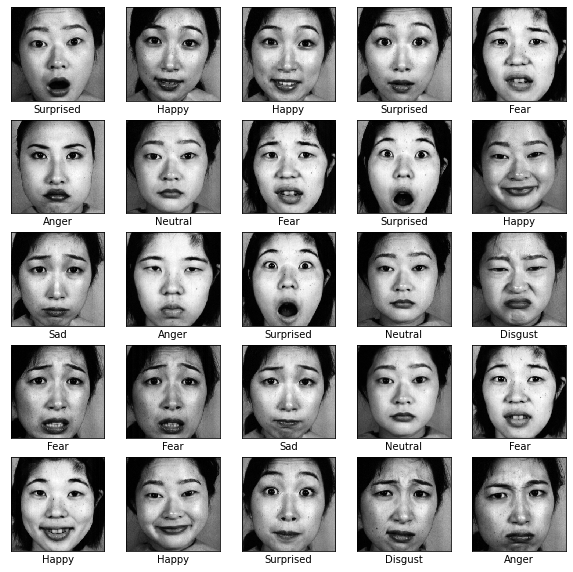

In [133]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel(class_names[Y[i]])
plt.show()

## Split into train, test

In [134]:
X_flatten[0].shape

(65536,)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X_flatten, Y, test_size=0.20, random_state=42)

In [136]:
X_train.shape

(362, 65536)

In [137]:
Y_train

array([1, 5, 0, 3, 6, 1, 6, 0, 6, 1, 6, 2, 5, 0, 0, 3, 6, 5, 6, 1, 5, 0,
       3, 1, 2, 3, 1, 5, 0, 6, 0, 4, 5, 5, 4, 5, 4, 6, 0, 0, 1, 0, 1, 3,
       3, 2, 5, 1, 3, 0, 4, 3, 5, 0, 5, 6, 2, 1, 2, 0, 6, 6, 4, 4, 0, 3,
       4, 0, 2, 3, 4, 1, 2, 0, 1, 3, 6, 5, 5, 1, 3, 3, 0, 6, 4, 6, 3, 3,
       2, 3, 3, 2, 1, 0, 6, 3, 2, 3, 4, 0, 4, 0, 1, 3, 6, 4, 5, 3, 4, 1,
       4, 5, 0, 5, 0, 4, 5, 4, 4, 0, 2, 6, 0, 3, 0, 4, 3, 1, 0, 4, 0, 4,
       5, 1, 4, 6, 3, 4, 1, 1, 2, 0, 5, 0, 6, 0, 3, 2, 1, 6, 6, 1, 3, 6,
       5, 5, 2, 1, 2, 5, 6, 1, 0, 4, 6, 6, 4, 6, 1, 1, 2, 2, 2, 5, 4, 1,
       6, 2, 2, 1, 1, 0, 4, 3, 5, 6, 0, 6, 5, 1, 2, 1, 5, 6, 6, 4, 6, 4,
       0, 4, 6, 4, 0, 4, 0, 4, 5, 6, 1, 6, 1, 6, 3, 5, 4, 1, 6, 3, 2, 1,
       3, 2, 6, 2, 3, 5, 1, 3, 4, 6, 3, 5, 0, 4, 2, 6, 3, 3, 5, 5, 6, 1,
       4, 2, 1, 0, 3, 1, 4, 6, 1, 5, 3, 0, 2, 4, 4, 6, 6, 2, 3, 2, 2, 1,
       1, 4, 2, 4, 2, 3, 1, 6, 0, 1, 4, 6, 3, 5, 3, 0, 6, 5, 2, 1, 2, 4,
       6, 4, 5, 5, 4, 4, 1, 2, 2, 3, 5, 2, 4, 2, 5,

### LETS CREATE A MODEL 

In [0]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape = (65536,)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(7, activity_regularizer=tf.keras.regularizers.l2(0.001))
])

### LETS COMPILE THE MODEL

In [0]:
model.compile(optimizer='Adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'], run_eagerly=True)

### FEED THE MODEL

In [140]:
model.fit(X_train, Y_train, epochs=60)

Epoch 1/60
12/12 [==============================] - 1s 65ms/step - loss: 8.0944 - accuracy: 0.1298
Epoch 2/60
12/12 [==============================] - 1s 61ms/step - loss: 2.6393 - accuracy: 0.2099
Epoch 3/60
12/12 [==============================] - 1s 62ms/step - loss: 2.0447 - accuracy: 0.2099
Epoch 4/60
12/12 [==============================] - 1s 61ms/step - loss: 2.0394 - accuracy: 0.2320
Epoch 5/60
12/12 [==============================] - 1s 60ms/step - loss: 2.0246 - accuracy: 0.2762
Epoch 6/60
12/12 [==============================] - 1s 61ms/step - loss: 1.8533 - accuracy: 0.2735
Epoch 7/60
12/12 [==============================] - 1s 62ms/step - loss: 1.7749 - accuracy: 0.2735
Epoch 8/60
12/12 [==============================] - 1s 61ms/step - loss: 1.8011 - accuracy: 0.4282
Epoch 9/60
12/12 [==============================] - 1s 60ms/step - loss: 1.9108 - accuracy: 0.2707
Epoch 10/60
12/12 [==============================] - 1s 61ms/step - loss: 1.7970 - accuracy: 0.2873
Epoch 11/

In [141]:
est_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

print('\nTest accuracy:', test_acc)

3/3 - 0s - loss: 1.5569 - accuracy: 0.5275

Test accuracy: 0.5274725556373596


In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(X_test)

In [144]:
predictions[0]

array([0.28819346, 0.07667705, 0.018339  , 0.04596484, 0.01074533,
       0.06403587, 0.49604434], dtype=float32)

In [145]:
np.argmax(predictions[0])

6

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap='gray')

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(7))
  plt.yticks([])
  thisplot = plt.bar(range(7), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

The following code will show you an image in the dataset. Feel free to change the index and re-run the cell multiple times to see other images. 

In [147]:
X_test.reshape(91, 256,256).shape

(91, 256, 256)

In [148]:
X_test.shape
Y_test.shape

(91,)

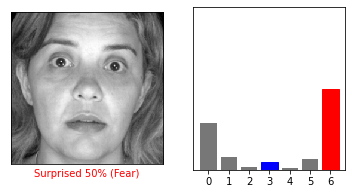

In [149]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], Y_test, X_test.reshape(91, 256,256))
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  Y_test)
plt.show()

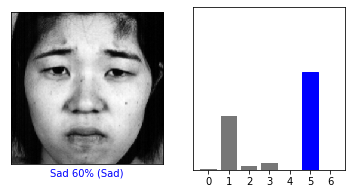

In [150]:
i = 65
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], Y_test, X_test.reshape(91, 256,256))
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  Y_test)
plt.show()

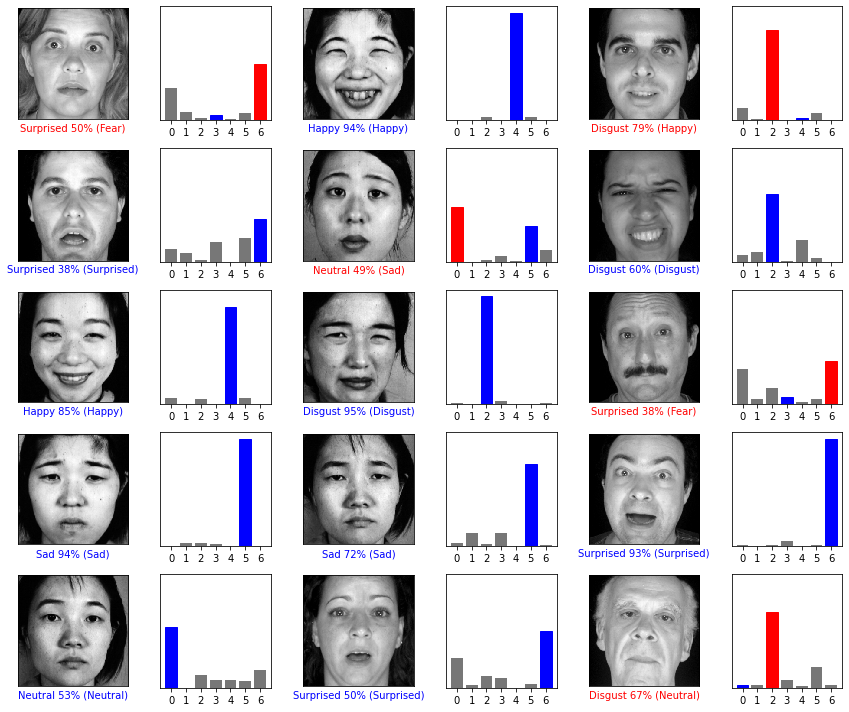

In [151]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], Y_test, X_test.reshape(91,256,256))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], Y_test)
plt.tight_layout()
plt.show()
